In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

In [3]:
df=pd.read_csv('Cars Dataset with Battery Pack Capacity.csv')

In [4]:
df.head()

Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla  Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                      ID.3 Pure      10.0           160   
2    Polestar                              2       4.7           210   
3         BMW                            iX3       6.8           180   
4       Honda                              e       9.5           145   

   Range_Km  Battery_Pack Kwh  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0       460              70.0              161             940         Yes   
1       270              45.0              167             250         Yes   
2       400              75.0              181             620         Yes   
3       360              74.0              206             560         Yes   
4       170              28.5              168             190         Yes   

  PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro  
0        AWD  Type 2 CCS      Sedan       D      5      55480  
1        RWD  Type 2 CCS  Hatchback       C      5      30000  
2        AWD  Type 2 CCS   Liftback       D      5      56440  
3        RWD  Type 2 CCS        SUV       D      5      68040  
4        RWD  Type 2 CCS  Hatchback       B      4      32997

In [5]:
df.shape

(102, 15)

In [6]:
df.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    object 
 1   Model             102 non-null    object 
 2   AccelSec          102 non-null    float64
 3   TopSpeed_KmH      102 non-null    int64  
 4   Range_Km          102 non-null    int64  
 5   Battery_Pack Kwh  102 non-null    float64
 6   Efficiency_WhKm   102 non-null    int64  
 7   FastCharge_KmH    102 non-null    int64  
 8   RapidCharge       102 non-null    object 
 9   PowerTrain        102 non-null    object 
 10  PlugType          102 non-null    object 
 11  BodyStyle         102 non-null    object 
 12  Segment           102 non-null    object 
 13  Seats             102 non-null    int64  
 14  PriceEuro         102 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 12.1+ KB


In [8]:
df.describe()

AccelSec  TopSpeed_KmH    Range_Km  Battery_Pack Kwh  \
count  102.000000    102.000000  102.000000        102.000000   
mean     7.391176    179.313725  338.627451         65.415686   
std      3.031913     43.771228  126.700623         29.955782   
min      2.100000    123.000000   95.000000         16.700000   
25%      5.100000    150.000000  250.000000         43.125000   
50%      7.300000    160.000000  340.000000         64.350000   
75%      9.000000    200.000000  400.000000         83.700000   
max     22.400000    410.000000  970.000000        200.000000   

       Efficiency_WhKm  FastCharge_KmH       Seats      PriceEuro  
count       102.000000      102.000000  102.000000     102.000000  
mean        189.303922      435.686275    4.882353   55997.588235  
std          29.679072      220.447384    0.799680   34250.724403  
min         104.000000        0.000000    2.000000   20129.000000  
25%         168.000000      260.000000    5.000000   34414.750000  
50%         180.500000      440.000000    5.000000   45000.000000  
75%         204.500000      557.500000    5.000000   65000.000000  
max         273.000000      940.000000    7.000000  215000.000000

# Data Visualization

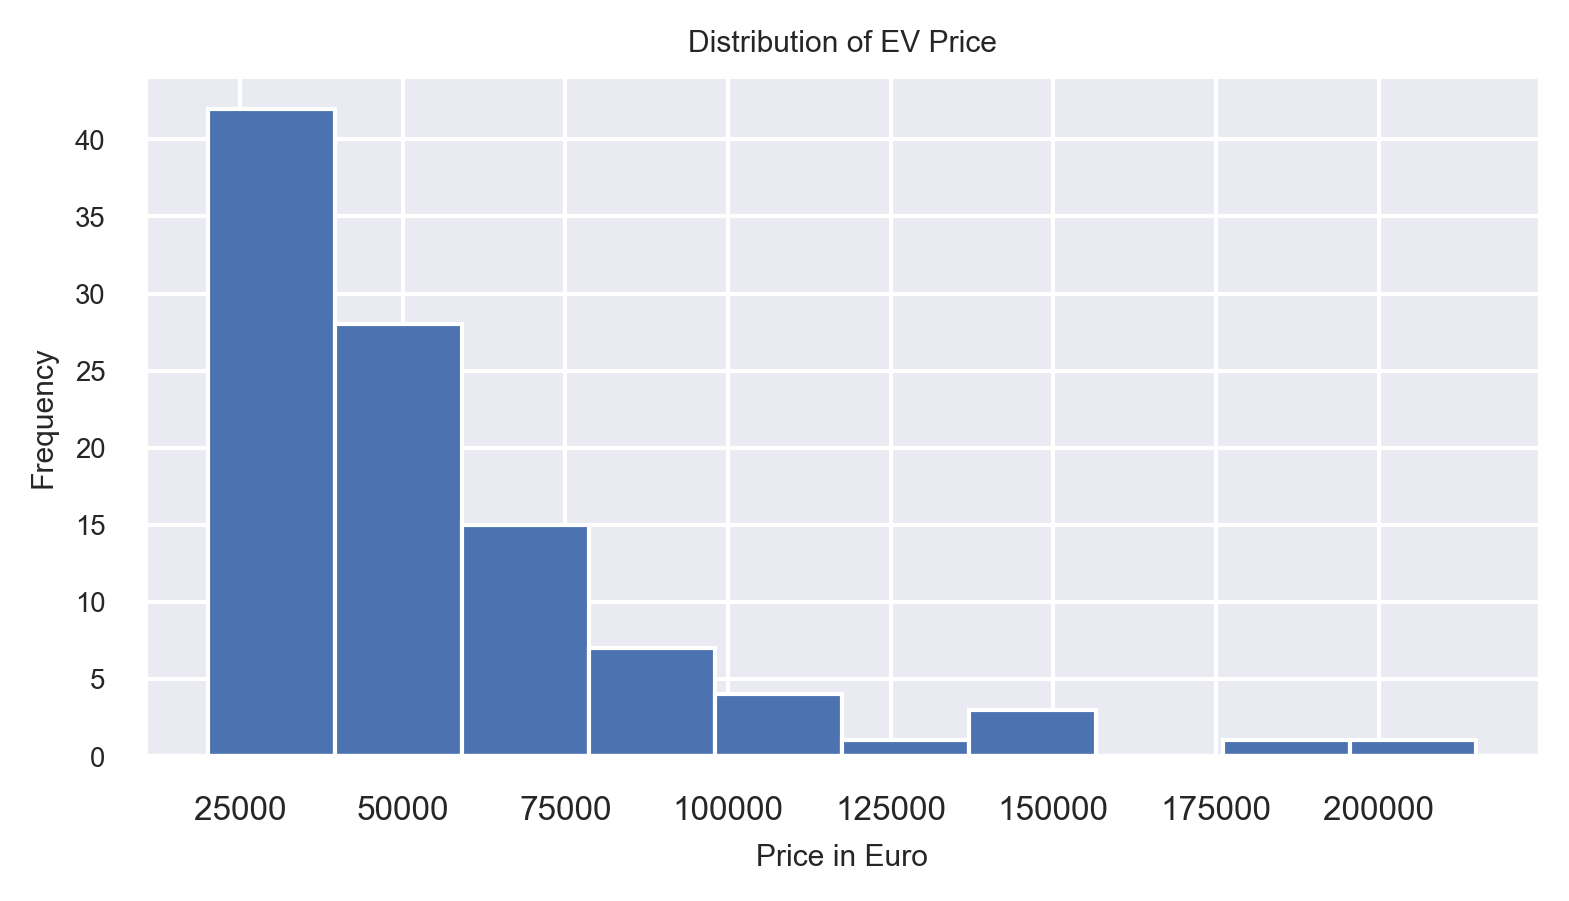

In [43]:
plt.figure(figsize=(6,3),dpi=150)
plt.hist(df['PriceEuro'])
plt.xlabel('Price in Euro')
plt.ylabel('Frequency')
plt.xticks(fontsize=8)
plt.title('Distribution of EV Price')
plt.show()

In [10]:
fig = px.box(df, y="PriceEuro")
fig.show()

# Conclusion: 3/4th of the electric cars are in the range of 20000-65000 Euro.

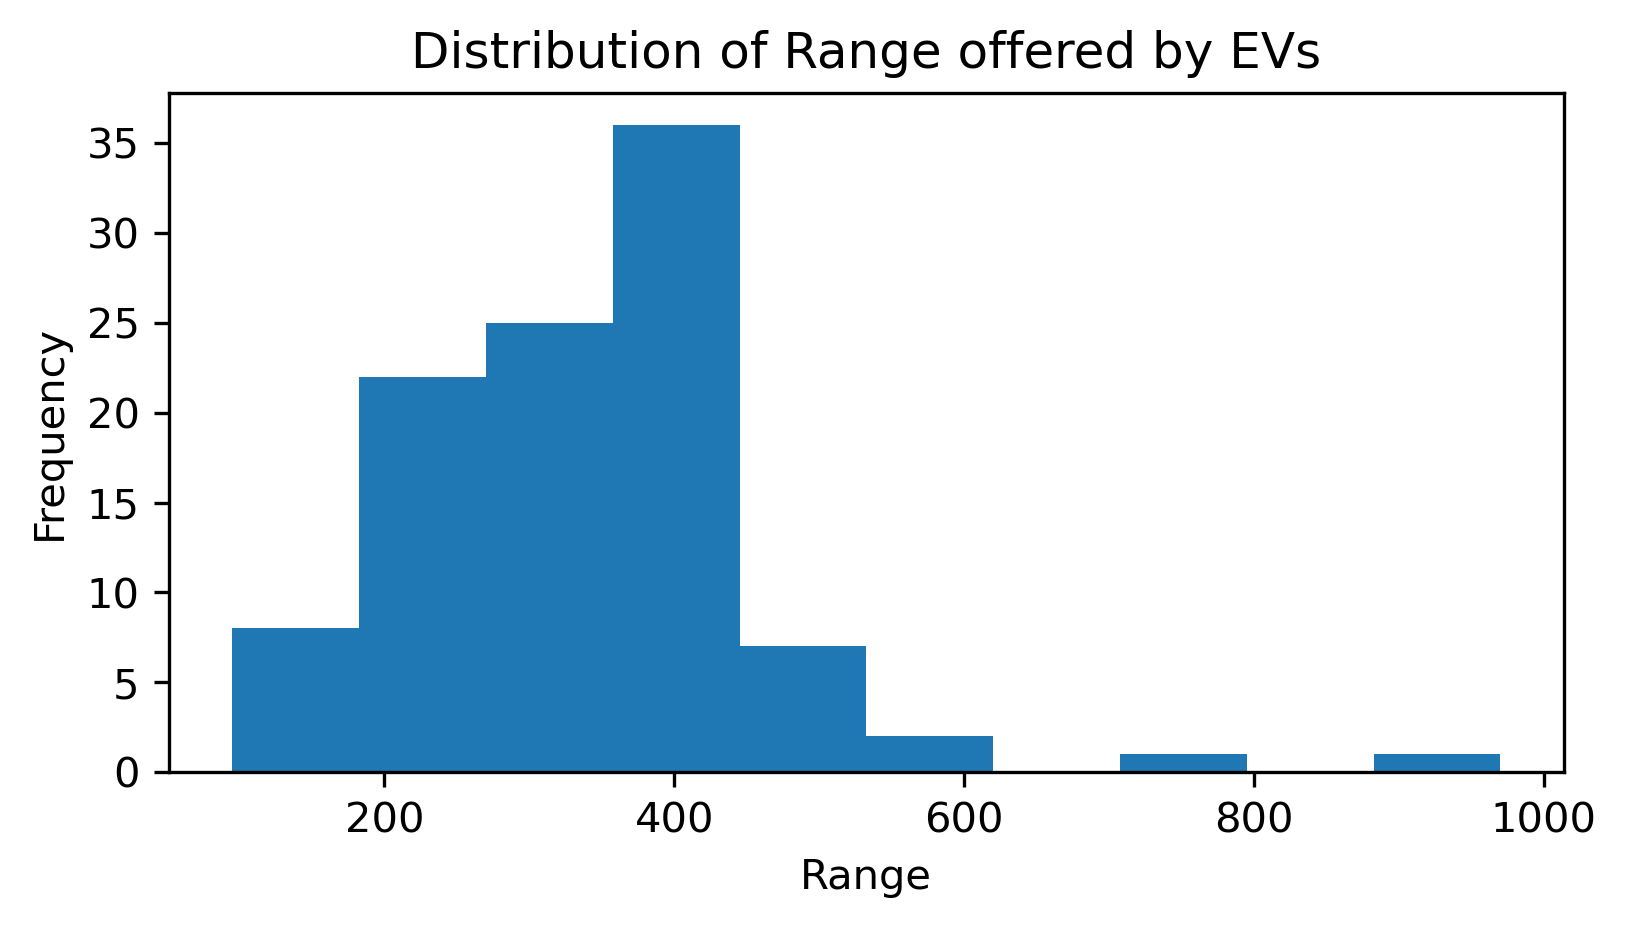

In [11]:
plt.figure(figsize=(6,3),dpi=150)
plt.hist(df['Range_Km'])
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.title('Distribution of Range offered by EVs')
plt.show()

In [12]:
fig = px.box(df, y="Range_Km")
fig.show()

# Conclusion: Most of the electric cars provide a range between 200-400 Km.

In [13]:
fig = px.scatter(df, x="Range_Km", y="PriceEuro", color="Efficiency_WhKm",
                 size='PriceEuro', hover_data=['Range_Km'])
fig.show()

# Conclusion: As the range increases, so does the price of the car and its efficiency. More efficient the car is, more expensive the car will be.

In [14]:
fig = px.scatter(df, x="FastCharge_KmH", y="PriceEuro", color="Efficiency_WhKm",
                 size='PriceEuro', hover_data=['Range_Km'])
fig.show()

# Conclusion: As the Fast Charging range increases, so does the price of the car. The faster the car charges, more expensive the car will be.

In [15]:
df['Car_Name']=df['Brand'].str.cat(df['Model'],sep=' ')

In [16]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro',
       'Car_Name'],
      dtype='object')

In [17]:
top20_range=df[['Brand','Model','Car_Name','Range_Km']].copy().sort_values(by='Range_Km',ascending=False).head(20)
top20_range

Brand                           Model  \
51       Tesla                        Roadster   
33       Tesla            Cybertruck Tri Motor   
5        Lucid                             Air   
48   Lightyear                             One   
40       Tesla              Model S Long Range   
59       Tesla             Model S Performance   
67       Tesla           Cybertruck Dual Motor   
0        Tesla   Model 3 Long Range Dual Motor   
54       Tesla              Model X Long Range   
13         BMW                              i4   
64        Ford           Mustang Mach-E ER RWD   
81       Tesla             Model X Performance   
15  Volkswagen                      ID.3 Pro S   
62      Nissan                     Ariya 87kWh   
24       Tesla  Model 3 Long Range Performance   
69        Ford           Mustang Mach-E ER AWD   
65     Porsche                  Taycan 4S Plus   
21       Tesla   Model Y Long Range Dual Motor   
23        Audi                       e-tron GT   
37       CUPRA                         el-Born   

                                Car_Name  Range_Km  
51                        Tesla Roadster       970  
33            Tesla Cybertruck Tri Motor       750  
5                              Lucid Air       610  
48                         Lightyear One       575  
40              Tesla Model S Long Range       515  
59             Tesla Model S Performance       505  
67           Tesla Cybertruck Dual Motor       460  
0    Tesla Model 3 Long Range Dual Motor       460  
54              Tesla Model X Long Range       450  
13                                BMW i4       450  
64            Ford Mustang Mach-E ER RWD       450  
81             Tesla Model X Performance       440  
15                 Volkswagen ID.3 Pro S       440  
62                    Nissan Ariya 87kWh       440  
24  Tesla Model 3 Long Range Performance       435  
69            Ford Mustang Mach-E ER AWD       430  
65                Porsche Taycan 4S Plus       425  
21   Tesla Model Y Long Range Dual Motor       425  
23                        Audi e-tron GT       425  
37                         CUPRA el-Born       425

In [18]:
plt.figure(figsize=(10,4))
fig=px.bar(top20_range,x='Car_Name',y='Range_Km',color='Range_Km',
           color_continuous_scale='plasma',
           title='Top 20 Cars according to its Range')
fig.update_layout( xaxis_title='Car',yaxis_title='Range in KM',title_x=0.5,title_y=0.88)
for i,(name,km) in enumerate(zip(top20_range['Car_Name'],top20_range['Range_Km'])):
    fig.add_annotation(x=name,y=km,text=km,showarrow=True,
                       arrowhead=1,arrowsize=1,font=dict(size=10),
                      xanchor='left',yanchor='top')
fig.show()

<Figure size 720x288 with 0 Axes>

# Conclusion: 7 out of top 10 EV according to range are from Tesla.

In [19]:
fastest_top20=df[['Car_Name','TopSpeed_KmH']].copy().sort_values(by='TopSpeed_KmH',ascending=False).head(20)
fastest_top20

Car_Name  TopSpeed_KmH
51                        Tesla Roadster           410
59             Tesla Model S Performance           261
24  Tesla Model 3 Long Range Performance           261
16                Porsche Taycan Turbo S           260
79                  Porsche Taycan Turbo           260
81             Tesla Model X Performance           250
72          Porsche Taycan Cross Turismo           250
5                              Lucid Air           250
65                Porsche Taycan 4S Plus           250
54              Tesla Model X Long Range           250
47                     Porsche Taycan 4S           250
40              Tesla Model S Long Range           250
61  Tesla Model Y Long Range Performance           241
23                        Audi e-tron GT           240
0    Tesla Model 3 Long Range Dual Motor           233
8      Tesla Model 3 Standard Range Plus           225
21   Tesla Model Y Long Range Dual Motor           217
2                             Polestar 2           210
98    Audi e-tron S Sportback 55 quattro           210
90              Audi e-tron S 55 quattro           210

In [20]:
plt.figure(figsize=(20,8))
fig=px.bar(fastest_top20,x='Car_Name',y='TopSpeed_KmH',color='TopSpeed_KmH',color_continuous_scale='rainbow')
fig.update_layout(title='Top 20 Fastest Cars',xaxis_title='Car',yaxis_title='Speed in KM/H',title_x=0.5,title_y=0.92)
for i,(name,speed) in enumerate(zip(fastest_top20['Car_Name'],fastest_top20['TopSpeed_KmH'])):
    fig.add_annotation(x=name,y=speed,text=speed,arrowhead=1,arrowsize=1)
fig.show()

<Figure size 1440x576 with 0 Axes>

# Conclusion: 10 out of top 20 fastest cars are from Tesla, followed by Porsche which offers 5 out of top 20 fastest cars.

In [21]:
acc_top20=df[['Car_Name','AccelSec']].copy().sort_values(by='AccelSec',ascending=False).head(20)
acc_top20

Car_Name  AccelSec
68     Renault Kangoo Maxi ZE 33      22.4
66         Nissan e-NV200 Evalia      14.0
77              Smart EQ forfour      12.7
57             Renault Twingo ZE      12.6
44             SEAT Mii Electric      12.3
43              Skoda CITIGOe iV      12.3
17              Volkswagen e-Up!      11.9
91        Smart EQ fortwo cabrio      11.9
82         Smart EQ fortwo coupe      11.6
60         Renault Zoe ZE40 R110      11.4
32         Renault Zoe ZE50 R110      11.4
84         Mercedes EQV 300 Long      10.0
1           Volkswagen ID.3 Pure      10.0
48                 Lightyear One      10.0
22             Skoda Enyaq iV 50      10.0
95             Kia e-Soul 39 kWh       9.9
41  Hyundai Kona Electric 39 kWh       9.9
75             Kia e-Niro 39 kWh       9.8
58                  Citroen e-C4       9.7
14        Hyundai IONIQ Electric       9.7

In [22]:
plt.figure(figsize=(20,8))
fig=px.bar(acc_top20,x='Car_Name',y='AccelSec',color='AccelSec',color_continuous_scale='rainbow_r')
fig.update_layout(title='Top 20 Cars According to Acceleration',xaxis_title='Car',yaxis_title='Acceleration/Second',title_x=0.5,title_y=0.92)
for i,(name,acc) in enumerate(zip(acc_top20['Car_Name'],acc_top20['AccelSec'])):
    fig.add_annotation(x=name,y=acc,text=acc,arrowhead=1,arrowsize=1)
fig.show()

<Figure size 1440x576 with 0 Axes>

# Conclusion: Renault Kangoo Maxi ZE 33 is the best electric cars when it comes to acceleration per second.

In [23]:
top_cars=df.copy().sort_values(by=['Range_Km','AccelSec','TopSpeed_KmH'],ascending=False)
top15_cars=top_cars.head(15)
top15_cars

Brand                           Model  AccelSec  TopSpeed_KmH  \
51       Tesla                        Roadster       2.1           410   
33       Tesla            Cybertruck Tri Motor       3.0           210   
5        Lucid                             Air       2.8           250   
48   Lightyear                             One      10.0           150   
40       Tesla              Model S Long Range       3.8           250   
59       Tesla             Model S Performance       2.5           261   
67       Tesla           Cybertruck Dual Motor       5.0           190   
0        Tesla   Model 3 Long Range Dual Motor       4.6           233   
64        Ford           Mustang Mach-E ER RWD       7.0           180   
54       Tesla              Model X Long Range       4.6           250   
13         BMW                              i4       4.0           200   
15  Volkswagen                      ID.3 Pro S       7.9           160   
62      Nissan                     Ariya 87kWh       7.6           160   
81       Tesla             Model X Performance       2.8           250   
24       Tesla  Model 3 Long Range Performance       3.4           261   

    Range_Km  Battery_Pack Kwh  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
51       970             200.0              206             920         Yes   
33       750             200.0              267             710         Yes   
5        610             110.0              180             620         Yes   
48       575              60.0              104             540         Yes   
40       515              90.0              184             560         Yes   
59       505              90.0              188             550         Yes   
67       460             120.0              261             710         Yes   
0        460              70.0              161             940         Yes   
64       450              88.0              200             430         Yes   
54       450              90.0              211             490         Yes   
13       450              80.0              178             650         Yes   
15       440              77.0              175             590         Yes   
62       440              87.0              198             520         Yes   
81       440              90.0              216             480         Yes   
24       435              70.0              167             910         Yes   

   PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro  \
51        AWD  Type 2 CCS     Cabrio       S      4     215000   
33        AWD  Type 2 CCS     Pickup       N      6      75000   
5         AWD  Type 2 CCS      Sedan       F      5     105000   
48        AWD  Type 2 CCS   Liftback       F      5     149000   
40        AWD      Type 2   Liftback       F      5      79990   
59        AWD      Type 2   Liftback       F      5      96990   
67        AWD  Type 2 CCS     Pickup       N      6      55000   
0         AWD  Type 2 CCS      Sedan       D      5      55480   
64        RWD  Type 2 CCS        SUV       D      5      54475   
54        AWD      Type 2        SUV       F      7      85990   
13        RWD  Type 2 CCS      Sedan       D      5      65000   
15        RWD  Type 2 CCS  Hatchback       C      4      40936   
62        FWD  Type 2 CCS  Hatchback       C      5      50000   
81        AWD      Type 2        SUV       F      7     102990   
24        AWD  Type 2 CCS      Sedan       D      5      61480   

                                Car_Name  
51                        Tesla Roadster  
33            Tesla Cybertruck Tri Motor  
5                              Lucid Air  
48                         Lightyear One  
40              Tesla Model S Long Range  
59             Tesla Model S Performance  
67           Tesla Cybertruck Dual Motor  
0    Tesla Model 3 Long Range Dual Motor  
64            Ford Mustang Mach-E ER RWD  
54              Tesla Model X Long Range  
13                           

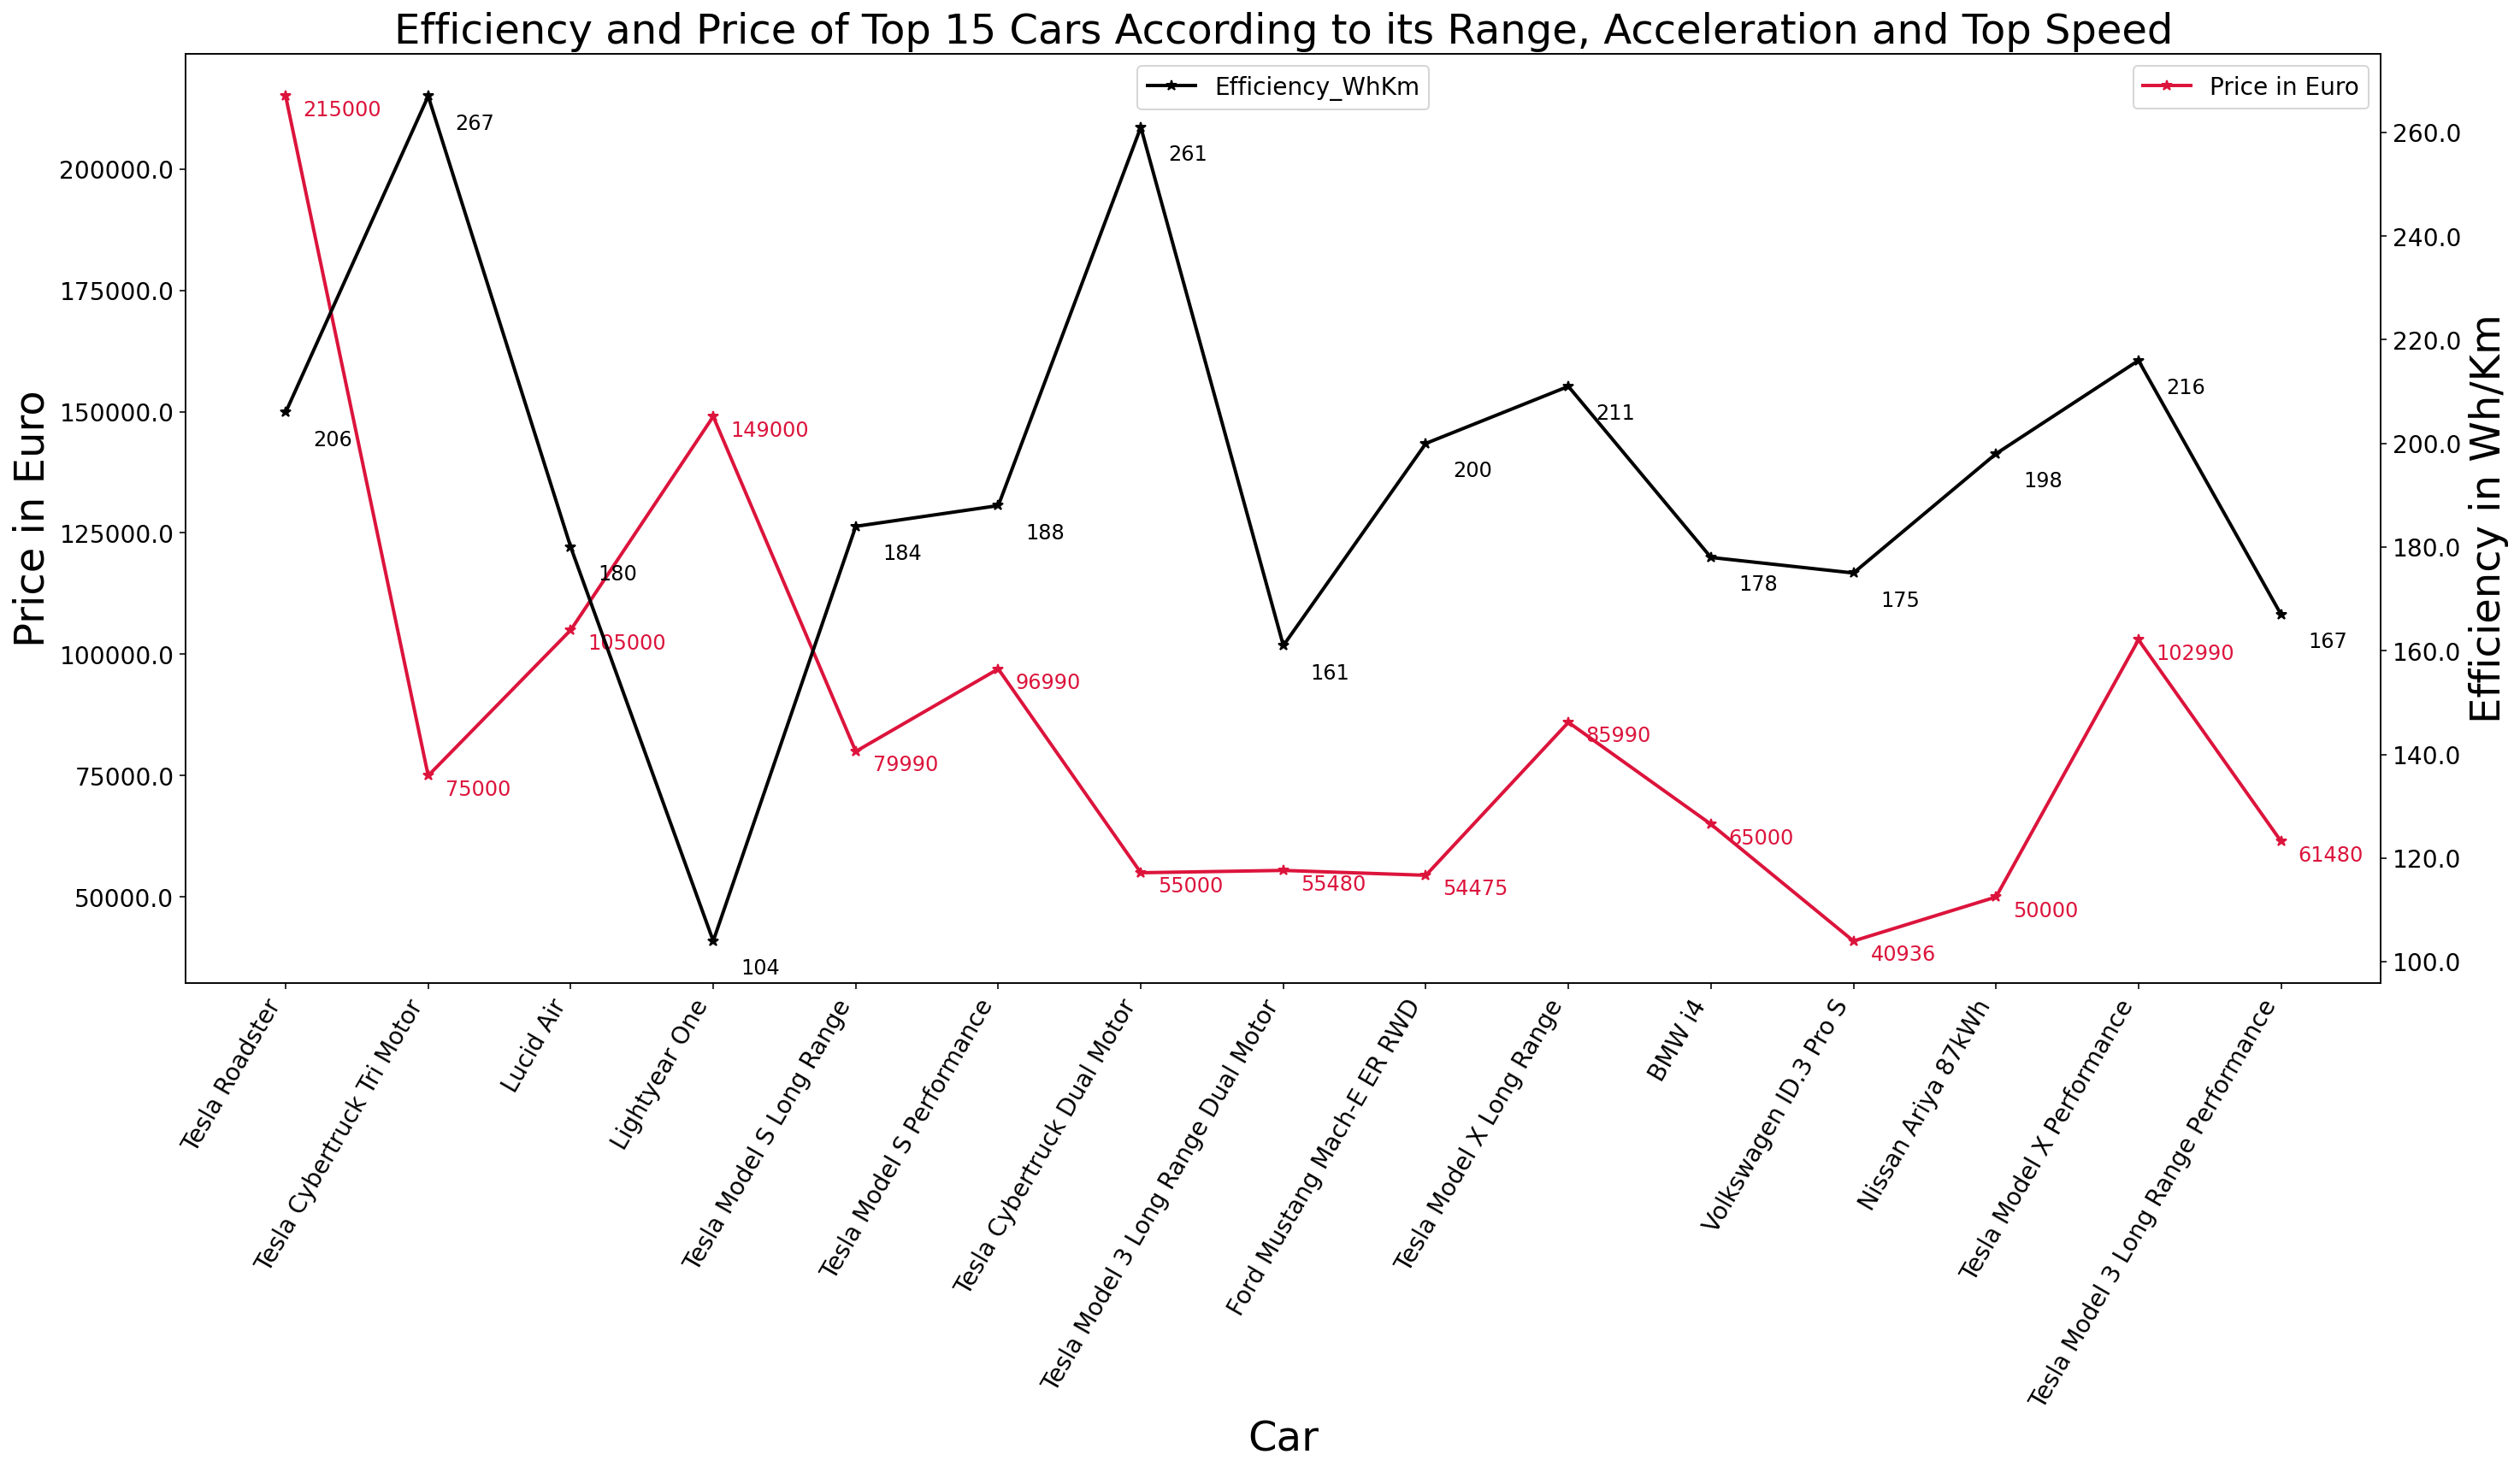

In [24]:
plt.rcParams['figure.figsize'] = (23, 10)
fig,ax = plt.subplots()
ax.plot(top15_cars['Car_Name'],top15_cars['PriceEuro'],color='crimson',linewidth=2,marker='*',label='Price in Euro')
ax.set_title('Efficiency and Price of Top 15 Cars According to its Range, Acceleration and Top Speed',fontsize=24)
ax.set_xlabel('Car',fontsize=24)
ax.set_ylabel('Price in Euro',fontsize=24)
ax.set_yticklabels(ax.get_yticks(), fontsize=14)
ax.legend(fontsize=14)

for i, val in enumerate(top15_cars['PriceEuro']):
    ax.annotate('{:.0f}'.format(val), xy=(i, val),xytext=(10,-2),textcoords='offset points',
                fontsize=12, va='top',color='crimson')
# Adjust the horizontal alignment of tick labels to the right
ax.set_xticklabels(top15_cars['Car_Name'], ha='right',fontsize=14)
plt.xticks(rotation=60)

ax2 = ax.twinx()
# plot line chart on axis #2
ax2.plot(top15_cars['Car_Name'],top15_cars['Efficiency_WhKm'],color='black',linewidth=2,label='Efficiency_WhKm',marker='*') 
ax2.set_ylabel('Efficiency in Wh/Km',fontsize=24)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=14)
ax2.legend(loc='upper center',fontsize=14)


for i, val in enumerate(top15_cars['Efficiency_WhKm']):
    ax2.annotate('{:.0f}'.format(val), xy=(i, val),xytext=(16,-10), textcoords='offset points', fontsize=12, va='top')
plt.show()



# Conclusion: Tesla is the best brand according to price and efficiency when sorted cars are sorted according to range, speed and acceleration. 

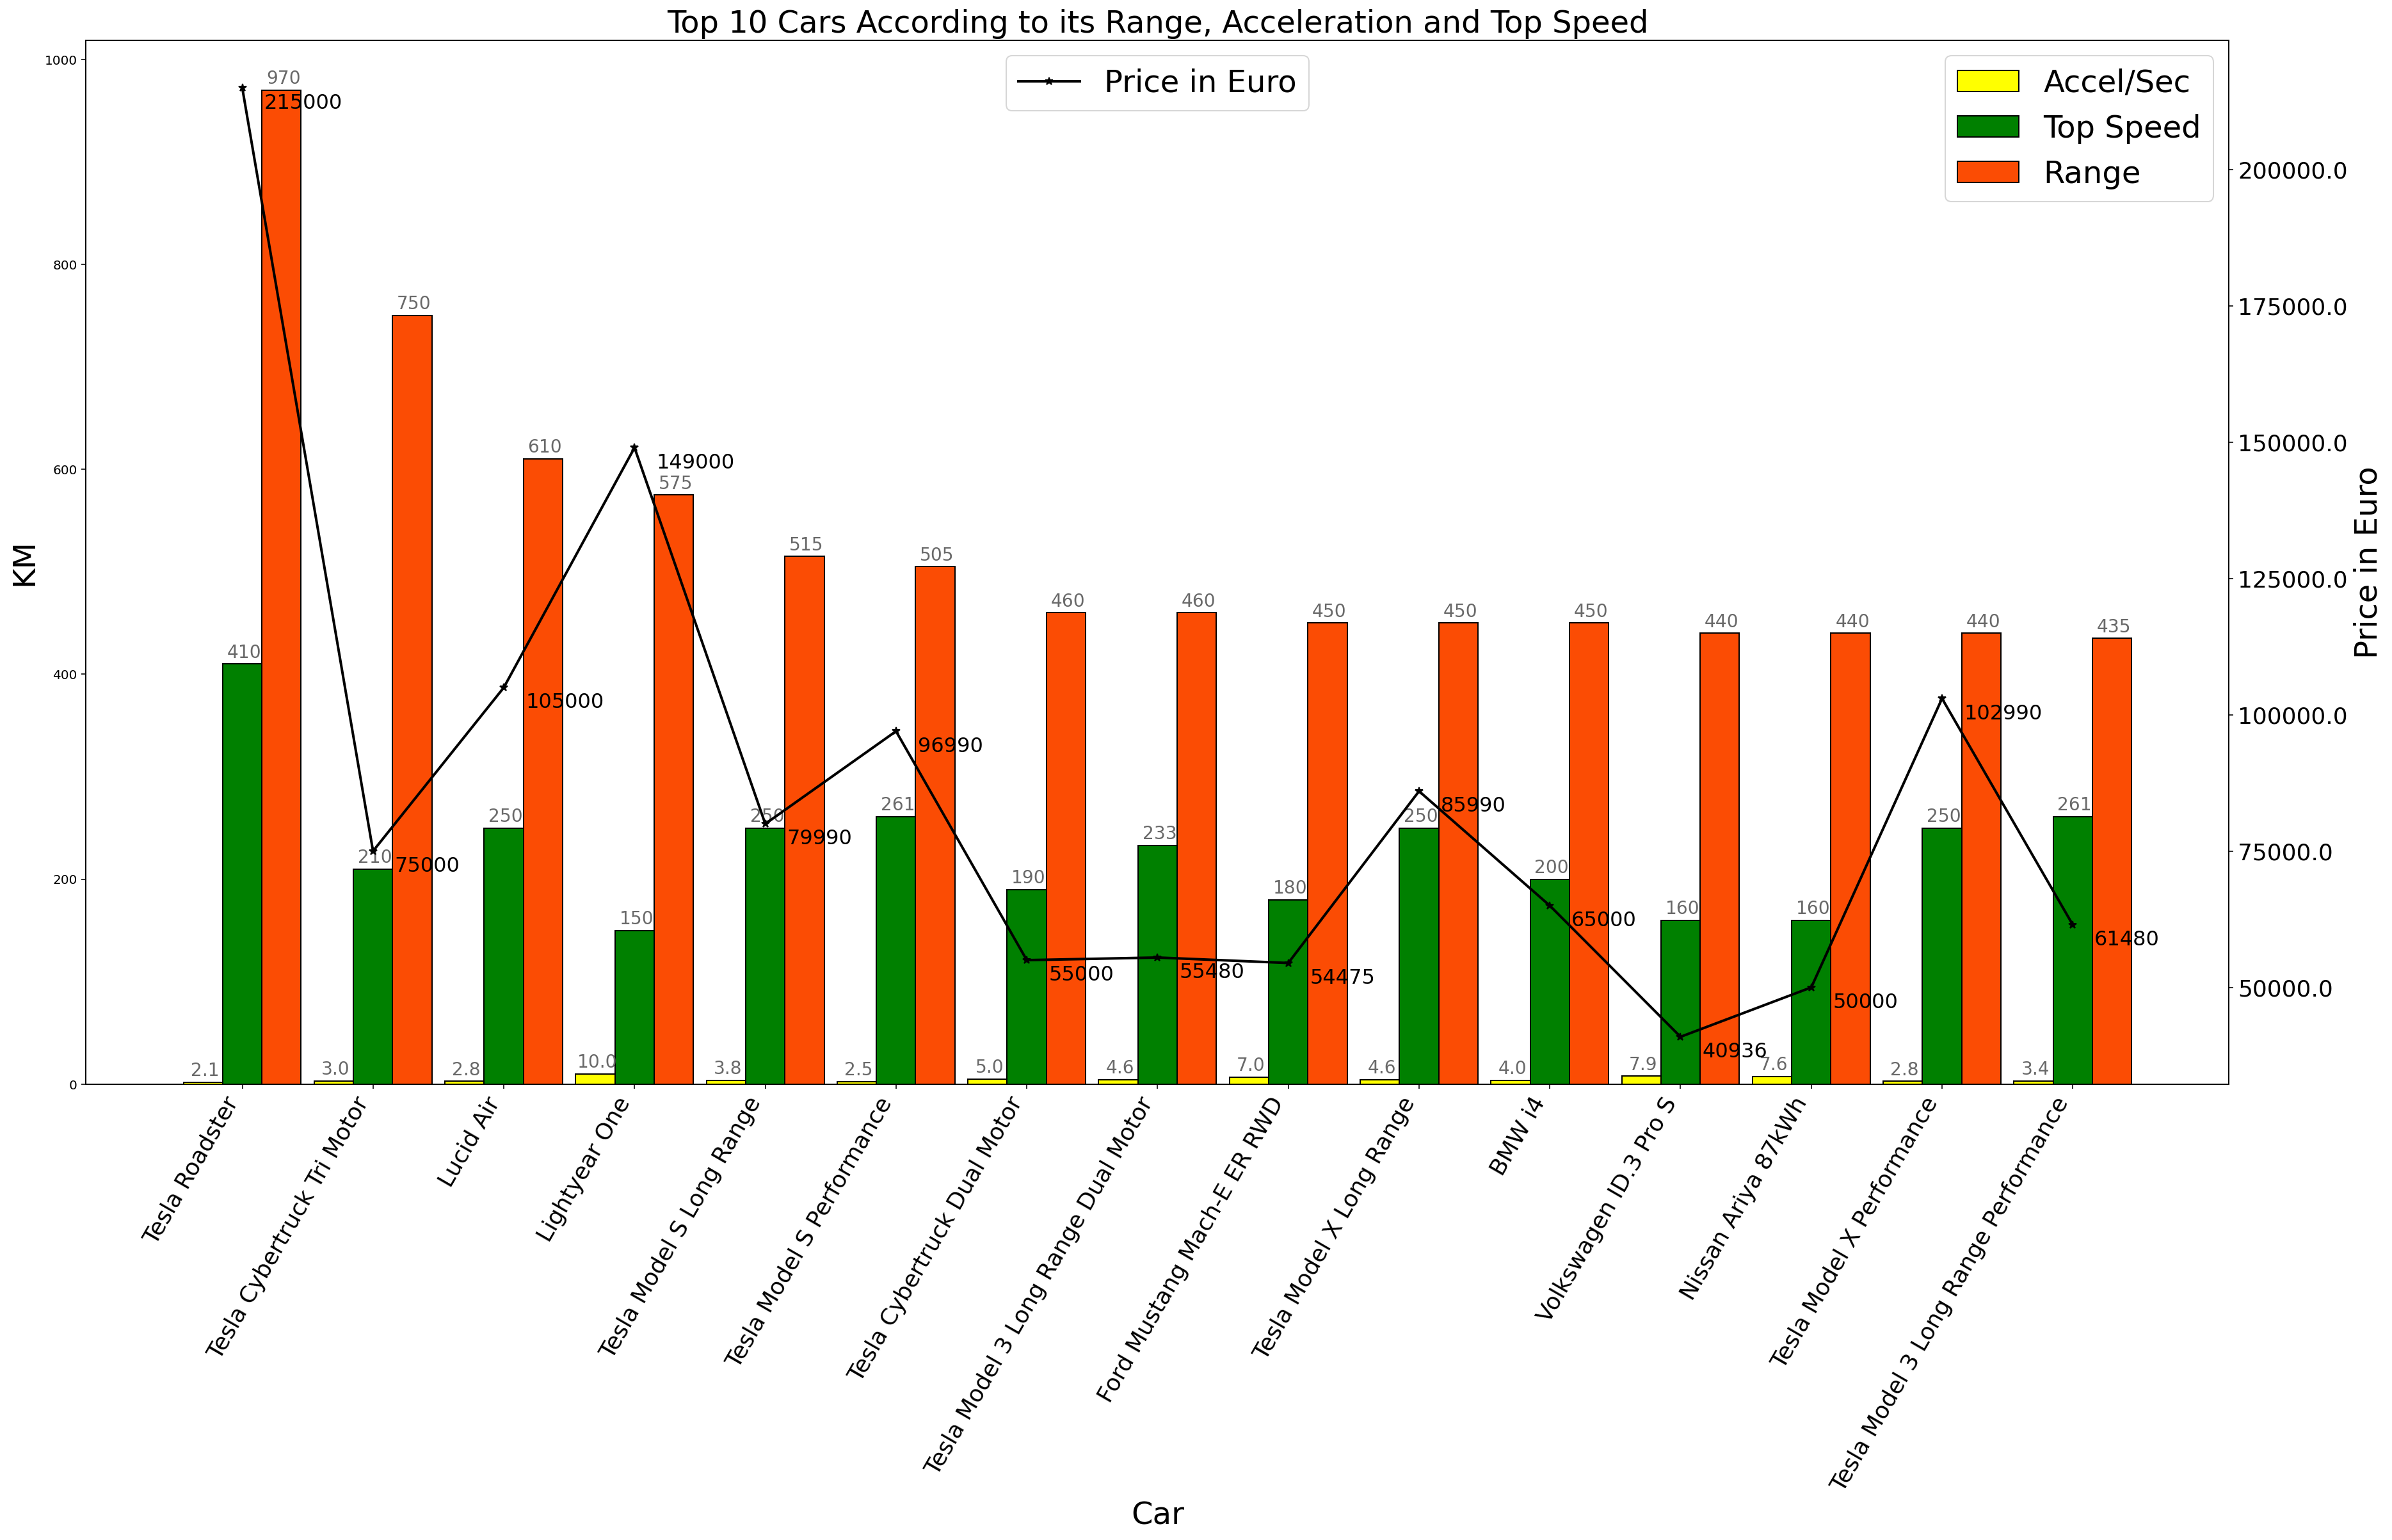

In [25]:
plt.rcParams['figure.figsize'] = (30, 15)
def autolabel(rectangle_group):
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height),
                    xy=(rect.get_x()+rect.get_width()/2,height),
                    ha='center',
                    xytext=(1.5,5),
                    textcoords='offset points',
                    color='dimgrey',
                    fontsize=14)

width = 0.3
x_accel = [x-width for x in range(len(top15_cars['Car_Name']))]
x_speed = [x for x in range(len(top15_cars['Car_Name']))]
x_range = [x+width for x in range(len(top15_cars['Car_Name']))]
fig,ax = plt.subplots()

rect1 = ax.bar(x_accel, top15_cars['AccelSec'], width, color='yellow', label='Accel/Sec', edgecolor='black',
               tick_label=top15_cars['Car_Name'])
rect2 = ax.bar(x_speed,top15_cars['TopSpeed_KmH'],width,color='green',label='Top Speed',edgecolor='black')
rect3 = ax.bar(x_range, top15_cars['Range_Km'], width, color='#fb4c04',label='Range', edgecolor='black')
autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
ax.set_title('Top 10 Cars According to its Range, Acceleration and Top Speed',fontsize=24)
ax.set_xlabel('Car',fontsize=24)
ax.set_ylabel('KM',fontsize=24)
ax.legend(fontsize=24)

# Adjust the horizontal alignment of tick labels to the right
ax.set_xticklabels(top15_cars['Car_Name'], ha='right',fontsize=18)
plt.xticks(rotation=60)

ax2 = ax.twinx()
# plot line chart on axis #2
ax2.plot(top15_cars['Car_Name'],top15_cars['PriceEuro'],color='black',linewidth=2,label='Price in Euro',marker='*') 
ax2.set_ylabel('Price in Euro',fontsize=24)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=18)
ax2.legend(loc='upper center',fontsize=24)


for i, val in enumerate(top15_cars['PriceEuro']):
    ax2.annotate('{:.0f}'.format(val), xy=(i, val),xytext=(17,-4), textcoords='offset points', fontsize=16, va='top')
plt.show()



# Conclusion: Tesla Cybertruck Tri Motor is the most economical electric vehicle when its comes to range and top speed.

In [26]:
top20_efficiency=df[['Car_Name','Efficiency_WhKm']].nlargest(20,'Efficiency_WhKm')
top20_efficiency

Car_Name  Efficiency_WhKm
84                    Mercedes EQV 300 Long              273
90                 Audi e-tron S 55 quattro              270
33               Tesla Cybertruck Tri Motor              267
67              Tesla Cybertruck Dual Motor              261
98       Audi e-tron S Sportback 55 quattro              258
86            Tesla Cybertruck Single Motor              256
73                  Byton M-Byte 95 kWh 4WD              244
101                 Byton M-Byte 95 kWh 2WD              238
50                   Audi e-tron 55 quattro              237
63                            Jaguar I-Pace              232
100  Nissan Ariya e-4ORCE 87kWh Performance              232
30                   Audi e-tron 50 quattro              231
42         Audi e-tron Sportback 55 quattro              228
16                   Porsche Taycan Turbo S              223
96                  Byton M-Byte 72 kWh 2WD              222
87        Audi e- tron Sportback 50 quattro              219
72             Porsche Taycan Cross Turismo              217
10                  Mercedes EQC 400 4MATIC              216
81                Tesla Model X Performance              216
79                     Porsche Taycan Turbo              215

In [27]:
plt.figure(figsize=(20,8))
fig=px.bar(top20_efficiency,x='Car_Name',y='Efficiency_WhKm',color='Efficiency_WhKm',color_continuous_scale='plasma_r')
fig.update_layout(title='Top 20 Cars According to Efficiency',xaxis_title='Car',yaxis_title='Efficiency in Wh/Km',title_x=0.5,title_y=0.92)
for i,(name,eff) in enumerate(zip(top20_efficiency['Car_Name'],top20_efficiency['Efficiency_WhKm'])):
    fig.add_annotation(x=name,y=eff,text=eff,arrowhead=1,arrowsize=1)
fig.show()

<Figure size 1440x576 with 0 Axes>

# Conclusion: Mercedes EQV 300 Long is the most efficient EV followed by Audi e-tron S 55 quattro and Tesla Cybertruck tri motor.

In [28]:
rapidcharge=df['RapidCharge'].value_counts().reset_index()
rapidcharge=rapidcharge.rename(columns={'index':'RapidCharge','RapidCharge':'Yes/No'})
rapidcharge

RapidCharge  Yes/No
0         Yes      97
1          No       5

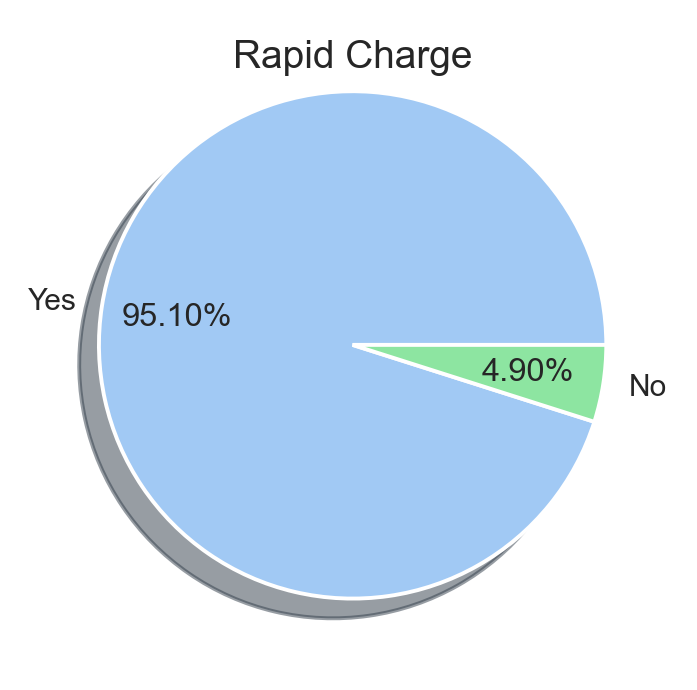

In [29]:
sns.set(font_scale = 0.7)
plt.figure(figsize=(3,3),dpi=140)
plt.pie(
    x=rapidcharge['Yes/No'], 
    labels=rapidcharge['RapidCharge'],
    autopct='%1.2f%%',
    colors=sns.color_palette('pastel6'),
    pctdistance=0.7,
    shadow=True
)
plt.title("Rapid Charge",x=0.5, y=0.9, fontsize=10)
plt.show()

# Conclusion: More than 95% electric cars supports rapid charge.

In [30]:
top20_rapid=df[['Car_Name','FastCharge_KmH']].nlargest(20,'FastCharge_KmH')
plt.figure(figsize=(20,8))
fig=px.bar(top20_rapid,x='Car_Name',y='FastCharge_KmH',color='FastCharge_KmH',
           color_continuous_scale='plasma_r')
fig.update_layout(title='Top 20 Cars According to Fast Charge Km/H',xaxis_title='Car',yaxis_title='Fast Charge Km/H',
                  title_x=0.5,title_y=0.92)
for i,(name,charge) in enumerate(zip(top20_rapid['Car_Name'],top20_rapid['FastCharge_KmH'])):
    fig.add_annotation(x=name,y=charge,text=charge,arrowhead=1,arrowsize=1)
fig.show()

<Figure size 1440x576 with 0 Axes>

# Conclusion: Tesla is the best brand when it comes to fast charging, followed by Porsche.

In [31]:
plugtype=df['PlugType'].value_counts().reset_index()
plugtype=plugtype.rename(columns={'index':'PlugType','PlugType':'Counts'})
plugtype

PlugType  Counts
0      Type 2 CCS      89
1          Type 2       9
2  Type 2 CHAdeMO       3
3  Type 1 CHAdeMO       1

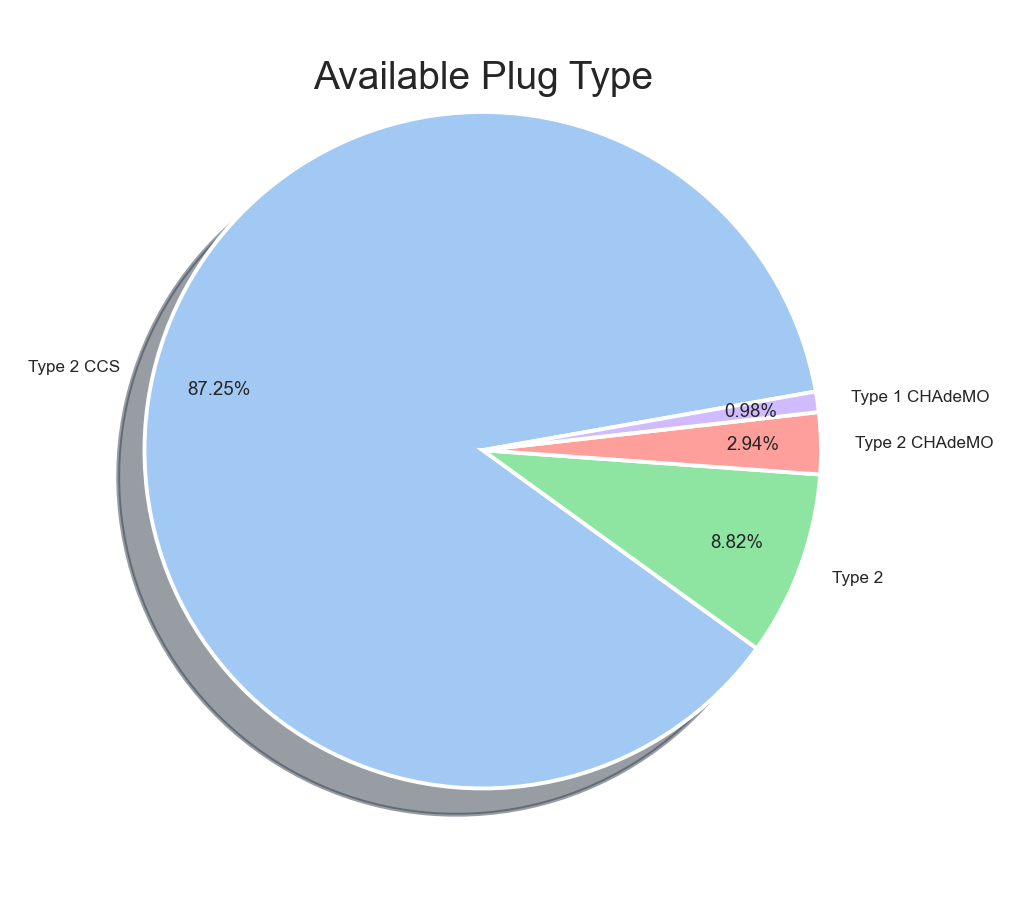

In [32]:
sns.set(font_scale = 0.4)
plt.figure(figsize=(4,4),dpi=140)
plt.pie(
    x=plugtype['Counts'], 
    labels=plugtype['PlugType'],
    autopct='%1.2f%%',
    colors=sns.color_palette('pastel6'),
    pctdistance=0.8,
    startangle=10,
    shadow=True
)
plt.title("Available Plug Type",x=0.5, y=0.9, fontsize=10)
plt.show()

# Conclusion: 87.25% electric vehicles have Type 2 CCS plug type.

In [33]:
powertrain=df['PowerTrain'].value_counts().reset_index()
powertrain

index  PowerTrain
0   AWD          41
1   FWD          36
2   RWD          25

In [34]:
plt.figure(figsize=(7,3))
fig=px.bar(powertrain,x='index',y='PowerTrain',color='PowerTrain',
           color_continuous_scale='plasma_r')
fig.update_layout(title='Total Electric Cars Available According to Power Train',xaxis_title='Car',yaxis_title='Total Models',
                      title_x=0.5,title_y=0.92)
for i,(name,freq) in enumerate(zip(powertrain['index'],powertrain['PowerTrain'])):
    fig.add_annotation(x=name,y=freq,text=freq,arrowhead=1,arrowsize=1)
fig.show()

<Figure size 504x216 with 0 Axes>

In [35]:
powertrain_df=df.groupby('PowerTrain')['PriceEuro','Range_Km'].mean().reset_index()

In [36]:
powertrain_df['PriceEuro'] = powertrain_df['PriceEuro'].round(2)  # Round to 2 decimal places
powertrain_df['Range_Km'] = powertrain_df['Range_Km'].round()
powertrain_df.head()

PowerTrain  PriceEuro  Range_Km
0        AWD   83840.10     427.0
1        FWD   35355.11     266.0
2        RWD   40061.04     299.0

In [37]:
plt.figure(figsize=(7,3))
fig=px.bar(powertrain_df,x='PowerTrain',y='PriceEuro',color='PriceEuro',
           color_continuous_scale='plasma_r')
fig.update_layout(title='Average Price of EV According to Power Train',xaxis_title='Power Train',yaxis_title='Average Price',
                      title_x=0.5,title_y=0.92)
for i,(name,price) in enumerate(zip(powertrain_df['PowerTrain'],powertrain_df['PriceEuro'])):
    fig.add_annotation(x=name,y=price,text=price,arrowhead=1,arrowsize=1)
fig.show()

<Figure size 504x216 with 0 Axes>

In [38]:
plt.figure(figsize=(7,3))
fig=px.bar(powertrain_df,x='PowerTrain',y='Range_Km',color='Range_Km',
           color_continuous_scale='plasma_r')
fig.update_layout(title='Average Range of EV According to Power Train',xaxis_title='Power Train',yaxis_title='Average Range',
                      title_x=0.5,title_y=0.92)
for i,(name,range) in enumerate(zip(powertrain_df['PowerTrain'],powertrain_df['Range_Km'])):
    fig.add_annotation(x=name,y=range,text=range,arrowhead=1,arrowsize=1)
fig.show()

<Figure size 504x216 with 0 Axes>

# Conclusion: AWD provides more range and they are also expensive then other powertrain cars.

In [39]:
seats=df['Seats'].value_counts().reset_index()
seats

index  Seats
0      5     70
1      4     21
2      7      6
3      6      3
4      2      2

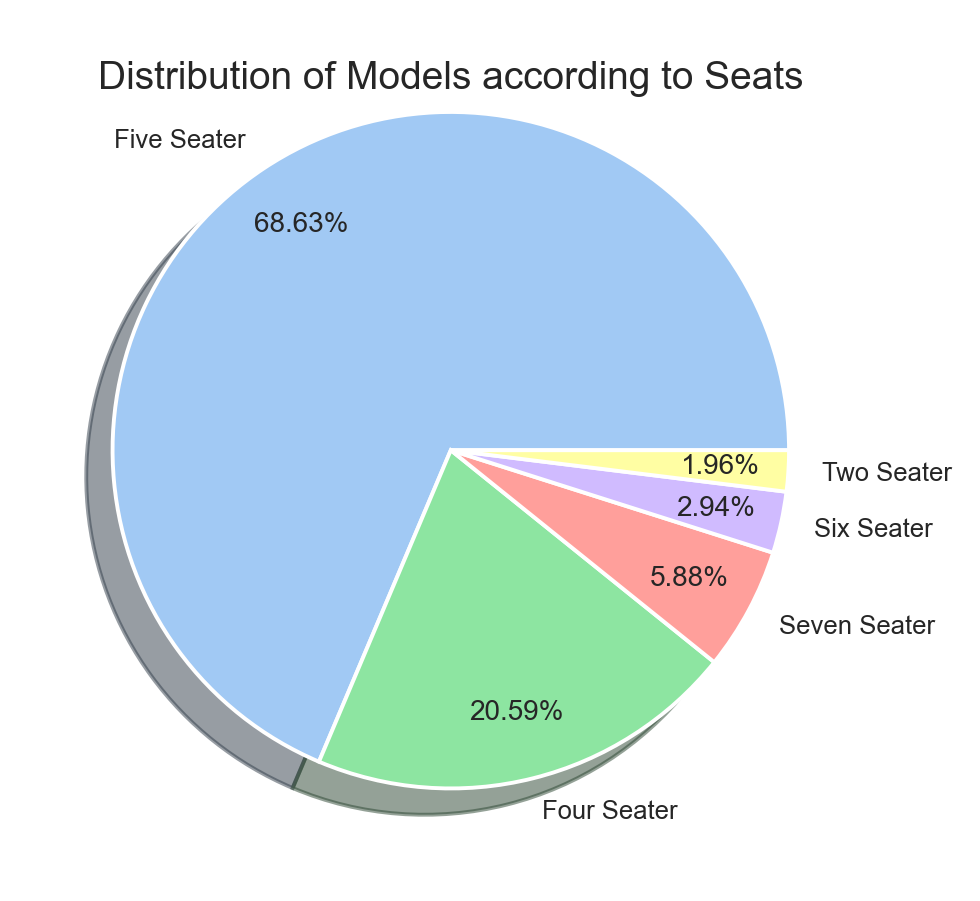

In [40]:
sns.set(font_scale = 0.6)
plt.figure(figsize=(4,4),dpi=140)
plt.pie(
    x=seats['Seats'], 
    labels=['Five Seater','Four Seater','Seven Seater','Six Seater','Two Seater'],
    autopct='%1.2f%%',
    colors=sns.color_palette('pastel6'),
    pctdistance=0.8,
    startangle=0,
    shadow=True
)
plt.title("Distribution of Models according to Seats",x=0.5, y=0.9, fontsize=10)
plt.show()